### Imports

In [37]:
import pandas as pd
import numpy as np
import cv2
import glob
import os
from fuzzywuzzy import fuzz
from matplotlib import pyplot as plt

### Sort, filter and structure videos and images 

In [ ]:
path_to_images = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/pictures/lateral/"
skier_images = glob.glob(path_to_images + "*.jpg")

path_to_videos = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/videos/lateral/"
skier_videos = glob.glob(path_to_videos + "*.[mM][pP]4") + glob.glob(path_to_videos + "*.[mM][oO][vV]")
skier_videos = [video for video in skier_videos if "_lq" not in video] # exclude all videos containing "_lq" to avoid double videos

image_file_names = []
video_file_names = []

for image_path in skier_images:
    file_name_with_extension = os.path.basename(image_path)
    image_file_names.append(file_name_with_extension)

for video_path in skier_videos:
    file_name_with_extension = os.path.basename(video_path)
    video_file_names.append(file_name_with_extension)

### Generation of a dictionary containing video names (keys) with 5 matching label imagenames (values) 

In [ ]:
videos_and_images_dict = {}

for video_string in video_file_names:
    images_per_vid_dict = {}
    for image_string in image_file_names:
        score = fuzz.ratio(video_string, image_string) # fuzzywuzzy used to compare simmilarity of strings
        images_per_vid_dict[image_string] = score

    top_5 = dict(sorted(images_per_vid_dict.items(), key=lambda item: item[1], reverse=True)[:5])
    key_list = list(top_5.keys())

    videos_and_images_dict[video_string] = key_list

### Find label frames in video 

In [68]:
videos_and_images_dict['Hermann Noemi.mp4'][0]

'Hermann Noemi_005.jpg'

In [ ]:

def part_of_frame_check(extracted_frame, screenshot):

    result = cv2.matchTemplate(extracted_frame, screenshot, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print(max_val)

def plot_frame(image):

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Plot the image with matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis
    plt.title("Image from OpenCV")
    plt.show()


### Vergleich von screenshot mit videoframe

0.9992160797119141


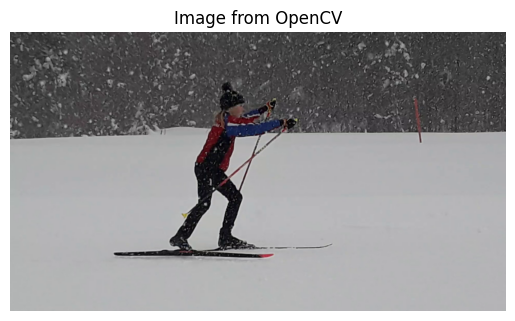

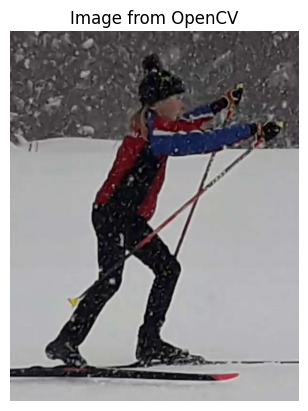

In [ ]:
path_to_screenshot = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/pictures/lateral/" + videos_and_images_dict['Hermann Noemi.mp4'][0]
screenshot = cv2.imread(path_to_screenshot, cv2.IMREAD_COLOR)

path_to_frame = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/videos/lateral/" + "Hermann Noemi.mp4"
test_cap = cv2.VideoCapture(path_to_frame)

test_cap.set(cv2.CAP_PROP_POS_FRAMES, 84)
ret, extracted_frame = test_cap.read()

part_of_frame_check(extracted_frame, screenshot)
plot_frame(extracted_frame)
plot_frame(screenshot)


'/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/pictures/lateral/Hermann Noemi_005.jpg'

In [ ]:
part_of_frame_check(,skier_images)